### Problem statement

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('IceCreamData.csv')

In [4]:
data.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
x = data["Temperature"]
y= data["Revenue"]

In [7]:
x.head(5)

0    24.566884
1    26.005191
2    27.790554
3    20.595335
4    11.503498
Name: Temperature, dtype: float64

In [8]:
y.head(5)

0    534.799028
1    625.190122
2    660.632289
3    487.706960
4    316.240194
Name: Revenue, dtype: float64

## Correlation


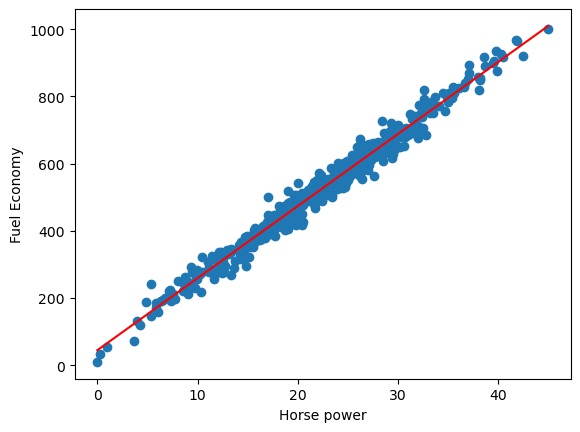

In [9]:
plt.scatter(x, y)
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
# Labelling axes
plt.xlabel('Horse power')
plt.ylabel('Fuel Economy')
plt.show()

In [10]:
correlation = y.corr(x)

In [11]:
correlation

0.9898015963401862

<AxesSubplot:>

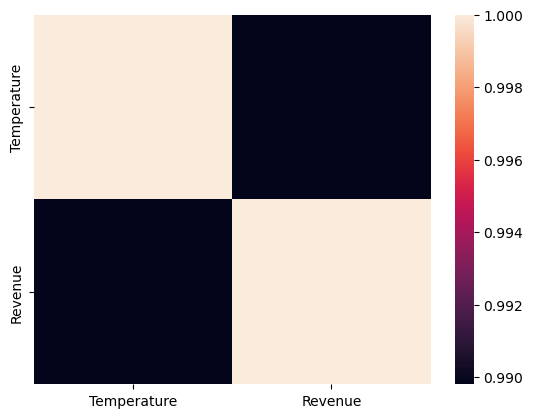

In [12]:
sns.heatmap(data.corr())

In [13]:
plt.show()

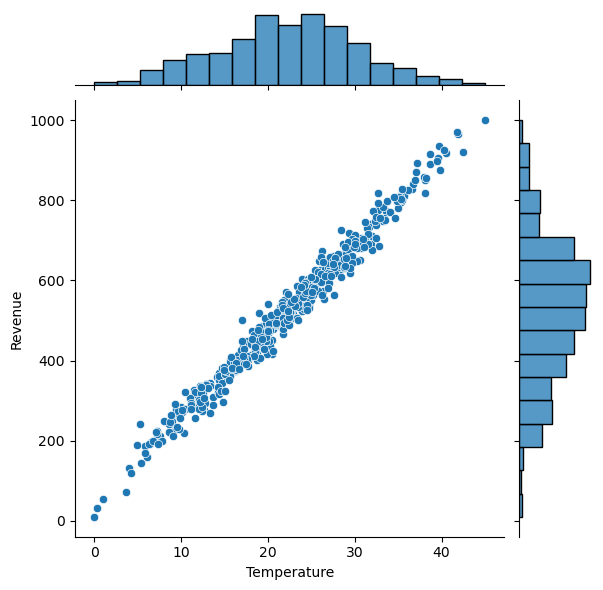

In [14]:
sns.jointplot(x = 'Temperature', y = 'Revenue', data = data)

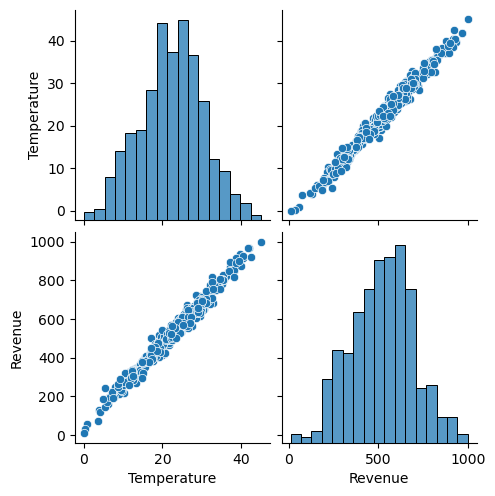

In [15]:
sns.pairplot(data)

From the graphs we can see we have a linear correlation between temperature and icecream revenue. A linear regression model will be a good idea here.

## Prediction

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=1)

In [18]:
X_train.head(5)

349    18.985275
334    30.456740
179    33.250899
71     27.887111
324    14.361424
Name: Temperature, dtype: float64

In [19]:
X_train.shape

(375,)

In [20]:
Y_train.shape

(375,)

In [21]:
model = LinearRegression().fit(X_train.to_numpy().reshape(-1,1), Y_train)

In [22]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [21.36998503]
Linear Model Coefficient (b):  45.17551072752184


In [23]:
model.predict(X_test.to_numpy().reshape(-1,1))

array([700.52019877, 619.49285274, 475.34370336, 649.15178482,
       433.01835055, 433.23770126, 748.10039671, 797.76740383,
       450.19059373, 494.09575047,  50.88188864, 584.57846969,
       890.14277394, 506.99464437, 455.5426928 , 621.40043484,
       806.56510398, 367.92472586, 472.92534529, 894.93434236,
       244.11608682, 536.75972202, 766.2887455 , 249.41435332,
       416.17409325, 423.21122163, 414.85923782, 352.46941993,
       246.12772065, 711.06489007, 306.09626734, 304.24413864,
       594.92842358, 359.99437378, 664.77123745, 698.29912391,
       816.98588868, 439.72755223, 520.63072924, 135.70870378,
       628.17143638, 535.40974353, 660.4195488 , 518.57599941,
       584.29265811, 370.31063147, 233.10963291, 444.97536407,
       581.81997924, 520.12604114, 533.91907851, 838.58044811,
       410.40232934, 621.24020718, 837.09463835, 251.42781972,
       517.85192021, 501.59616623, 492.83210799, 557.1856448 ,
       466.76423136, 533.30807794, 228.67846396, 407.49

#### Running linear regression on training set

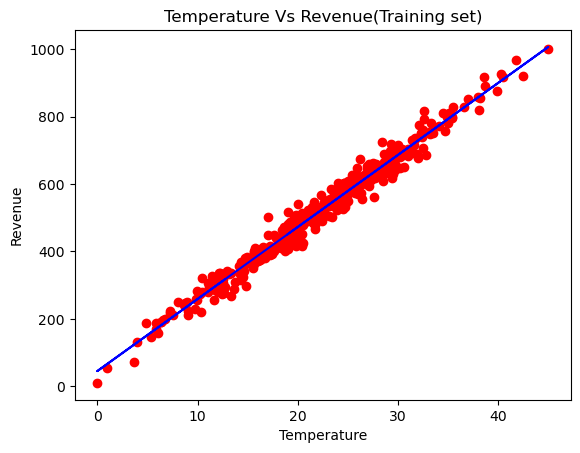

In [24]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, model.predict(X_train.to_numpy().reshape(-1,1)), color = 'blue')
plt.title('Temperature Vs Revenue(Training set)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

#### Running linear regression on test set

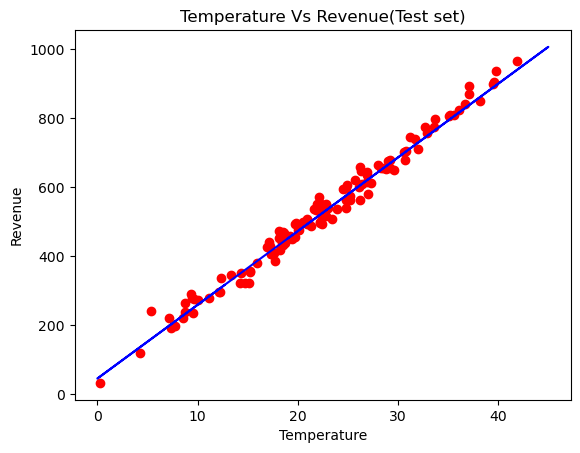

In [25]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, model.predict(X_train.to_numpy().reshape(-1,1)), color = 'blue')
plt.title('Temperature Vs Revenue(Test set)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

## Computer performance of models

In [26]:
def run_predictions_and_compute_error(model, X_test, Y_test_encoded):
    Y_prediction = model.predict(X_test)
    return mean_squared_error(Y_test_encoded, Y_prediction, squared=False), Y_prediction

In [27]:
rmse, Y_prediction = run_predictions_and_compute_error(model, X_test.to_numpy().reshape(-1,1), Y_test)

In [29]:
r2_score(Y_test,Y_prediction)

-0.7850711240005983